# Introduction to the `BrainGlobeAtlas` class

## 0. Creating a `BrainGlobeAtlas` object and listing available options

To instantiate a `BrainGlobeAtlas` object, we need to instantiate it with the atlas name. The first time we use it, a version of this atlas will be downloaded from the [remote GIN repository](http://gin.g-node.org/brainglobe/atlases) and stored on your local machine (by default, in .../Users/username/.brainglobe):

In [1]:
import numpy as np
from brainglobe_atlasapi import BrainGlobeAtlas
from pprint import pprint

bg_atlas = BrainGlobeAtlas("allen_mouse_100um", check_latest=False)

allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


To know what atlases are available through BrainGlobe, we can use the `show_atlases` function (we need to be online):

In [2]:
from brainglobe_atlasapi import show_atlases
show_atlases()

                                                                                  
                                                                                  
                                Brainglobe Atlases                                
╭──────────────────────────────────┬────────────┬───────────────┬────────────────╮
│ Name                             │ Downloaded │ Local version │ Latest version │
├──────────────────────────────────┼────────────┼───────────────┼────────────────┤
│ whs_sd_rat_39um                  │     ✔      │      1.0      │      1.0       │
│ allen_mouse_25um                 │     ✔      │      1.2      │      1.2       │
│ allen_mouse_100um                │     ✔      │      1.2      │      1.2       │
│ allen_mouse_50um                 │     ✔      │      1.2      │      1.2       │
│ example_mouse_100um              │    ---     │      ---      │      1.2       │
│ allen_mouse_10um                 │    ---     │      ---      │      1.2       │
│ mpin_zfish_1um                   │    ---     │      ---      │      1.0       │
│ allen_human_500um                │    ---     │      ---      │      0.1       │
│ kim_mouse_10um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_25um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_50um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_100um                  │    ---     │      ---      │      1.0       │
│ osten_mouse_10um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_25um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_50um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_100um                │    ---     │      ---      │      1.1       │
│ allen_cord_20um                  │    ---     │      ---      │      1.0       │
│ azba_zfish_4um                   │    ---     │      ---      │      1.1       │
│ perens_lsfm_mouse_20um           │    ---     │      ---      │      1.0       │
│ admba_3d_e11_5_mouse_16um        │    ---     │      ---      │      1.0       │
│ admba_3d_e13_5_mouse_16um        │    ---     │      ---      │      1.0       │
│ admba_3d_e15_5_mouse_16um        │    ---     │      ---      │      1.0       │
│ admba_3d_e18_5_mouse_16um        │    ---     │      ---      │      1.0       │
│ admba_3d_p4_mouse_16.752um       │    ---     │      ---      │      1.0       │
│ admba_3d_p14_mouse_16.752um      │    ---     │      ---      │      1.0       │
│ admba_3d_p28_mouse_16.752um      │    ---     │      ---      │      1.0       │
│ admba_3d_p56_mouse_25um          │    ---     │      ---      │      1.0       │
╰──────────────────────────────────┴────────────┴───────────────┴────────────────╯

## 1. Using a `BrainGlobe` atlas

A BrainGlobe atlas is a convenient API for interacting with an anatomical atlas. BrainGlobe atlases contain:
 * Metadata
 * The reference anatomical stack used for the registration itself
 * Region annotation stack (the segmented atlas image that occupies the same space as the reference stack)
 * Hemisphere annotation stack which denotes left and right
 * Description of the region hierarchy
 * Meshes for the regions

### 1.0 Metadata

All atlases have a standard set of medatata describing their source, species, resolution, etc:

In [3]:
bg_atlas.metadata

{'name': 'allen_mouse',
 'citation': 'Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007',
 'atlas_link': 'http://www.brain-map.org',
 'species': 'Mus musculus',
 'symmetric': True,
 'resolution': [100.0, 100.0, 100.0],
 'orientation': 'asr',
 'version': '1.2',
 'shape': [132, 80, 114],
 'trasform_to_bg': [[1.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 1.0]],
 'additional_references': []}

### 1.1 Reference, annotation and hemispheres stack

In [4]:
from matplotlib import pyplot as plt

Reference stack:

In [ ]:
space = bg_atlas.space
stack = bg_atlas.reference

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    mid_index = stack.shape[i]//2
    axs[i].imshow(np.moveaxis(stack,i,0)[mid_index,:,:], cmap="gray",clim=(0,250))
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

Annotation stack:

In [ ]:
space = bg_atlas.space
stack = bg_atlas.annotation

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    mid_index = stack.shape[i]//2
    axs[i].imshow(np.moveaxis(stack,i,0)[mid_index,:,:], cmap="gray",clim=(0,1250))
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])


Hemispheres stack:

In [ ]:
space = bg_atlas.space
stack = bg_atlas.hemispheres

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(stack.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])

### 1.2 Regions hierarchy

The atlas comes with a description of the hierarchy of brain structures. To have an overview:

In [5]:
bg_atlas.structures

root (997)
├── VS (73)
│   ├── AQ (140)
│   ├── V3 (129)
│   ├── V4 (145)
│   │   └── V4r (153)
│   ├── VL (81)
│   │   ├── SEZ (98)
│   │   └── chpl (108)
│   └── c (164)
├── fiber tracts (1009)
│   ├── cbf (960)
│   │   ├── arb (728)
│   │   ├── cbc (744)
│   │   └── cbp (752)
│   │       ├── icp (1123)
│   │       │   └── sctd (553)
│   │       ├── mcp (78)
│   │       └── scp (326)
│   │           ├── dscp (812)
│   │           ├── sctv (866)
│   │           └── uf (850)
│   ├── cm (967)
│   │   ├── IIIn (832)
│   │   │   ├── mlf (62)
│   │   │   └── pc (158)
│   │   ├── IIn (848)
│   │   │   ├── bsc (916)
│   │   │   ├── csc (336)
│   │   │   ├── och (117)
│   │   │   └── opt (125)
│   │   ├── IVn (911)
│   │   ├── In (840)
│   │   │   ├── aco (900)
│   │   │   ├── lotg (21)
│   │   │   │   ├── lot (665)
│   │   │   │   └── lotd (538)
│   │   │   └── onl (1016)
│   │   ├── VIIIn (933)
│   │   │   ├── cVIIIn (948)
│   │   │   │   ├── bic (482)
│   │   │   │   ├── cic (633)
│   │   

The structures attribute is a custom dictionary that can be queried by region number or acronym, and contains all the information for a given structure:

In [6]:
pprint(bg_atlas.structures["root"])

{'acronym': 'root',
 'id': 997,
 'mesh': None,
 'mesh_filename': PosixPath('/home/rob/.brainglobe/allen_mouse_100um_v1.2/meshes/997.obj'),
 'name': 'root',
 'rgb_triplet': [255, 255, 255],
 'structure_id_path': [997]}


In particular, the `structure_id_path` key contains a list description of the path in the hierarchy up to a particular region, and can be used for queries on the hierarchy.

In [7]:
bg_atlas.structures["CH"]["structure_id_path"]

[997, 8, 567]

We can use the `bg_atlas.get_structure_descendants` and `bg_atlas.get_structure_ancestors` methods to explore the hierarchy:

In [8]:
bg_atlas.get_structure_descendants("VISC")

['VISC1', 'VISC2/3', 'VISC4', 'VISC5', 'VISC6a', 'VISC6b']

In [9]:
bg_atlas.get_structure_ancestors("VISC6a")

['root', 'grey', 'CH', 'CTX', 'CTXpl', 'Isocortex', 'VISC']

---
**NOTE**: 
The levels of the hierarchy depend on the underlying atlas, so we cannot ensure the goodness and consistency of their hierarchy tree.
---

There is a higher level description of the structures hierarchy that is built using the [treelib](https://treelib.readthedocs.io/en/latest/) package, and is available as: 

In [10]:
bg_atlas.structures.tree

For most applications though, the methods described above and the list path of each region should be sufficient to query the hierarchy without additional layers of complication.

### 1.3 Region masks

The `get_structure_mask` method returns a mask volume where all voxels belonging to an area or to the descendants of that area are non-zero. All other voxels are zero. We will generate the structure mask for the primary visual cortex to see how this works. 

Primary visual cortex (`VISp`) has an ID value of `385`, but no voxels in the annotation image actually have that value:

In [11]:
pprint(bg_atlas.structures["VISp"])

{'acronym': 'VISp',
 'id': 385,
 'mesh': None,
 'mesh_filename': PosixPath('/home/rob/.brainglobe/allen_mouse_100um_v1.2/meshes/385.obj'),
 'name': 'Primary visual area',
 'rgb_triplet': [8, 133, 140],
 'structure_id_path': [997, 8, 567, 688, 695, 315, 669, 385]}


In [12]:
# No voxels in the annotation volume are labelled as being VISp
(bg_atlas.annotation==385).sum()

0

The reason no VISp voxels exist is because the annotation volume is segmented more finely. In this case `VISp` is divided into cortical layers and the IDs associated with these layers are the ones that are present in the annotation volume.

In [13]:
# The descendants (children) of VISp are cortical layers
bg_atlas.get_structure_descendants("VISp")

['VISp1', 'VISp2/3', 'VISp4', 'VISp5', 'VISp6a', 'VISp6b']

In [14]:
# The IDs associated with each layer in primary visual cortex
layers = bg_atlas.get_structure_descendants("VISp")
layer_ids = [bg_atlas.structures[this_layer]['id'] for this_layer in layers]

for (this_layer, this_id) in zip(layers, layer_ids):
    print("%s\t%s" % (this_layer, this_id))



VISp1	593
VISp2/3	821
VISp4	721
VISp5	778
VISp6a	33
VISp6b	305


These IDs are indeed present in the annotation volume:

In [15]:
# For example, we find over a thousand voxels associated with primary visual cortex layer 6
# in the annotation volume
(bg_atlas.annotation==778).sum()

1565

So let's use `get_structure_mask` to return a mask volume that retains only `VISp`.

In [16]:
mask_VISp = bg_atlas.get_structure_mask('VISp')

In [ ]:
f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(mask_VISp.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])


The `root` node encompasses the whole brain and we can use this to provide a background image for the above area.

In [23]:
mask_root = bg_atlas.get_structure_mask('root')

# The mask images have pixel values equal to the ID of the parent area, so we change these for
# plotting purposes. 
mask_root[mask_root>0]=5
mask_VISp[mask_VISp>0]=2
mask_VISp_root = mask_VISp + mask_root

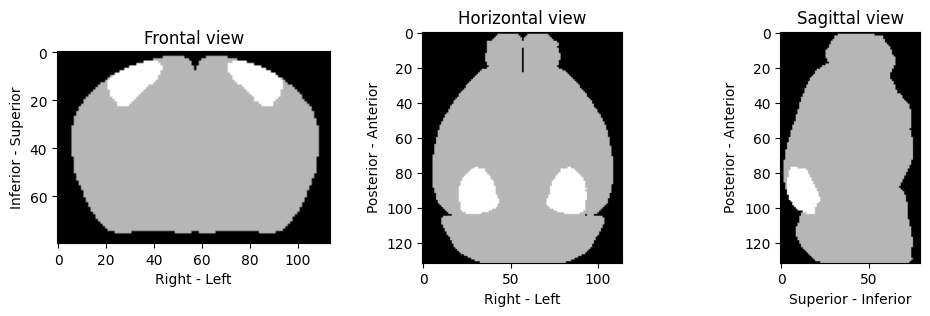

In [24]:
space = bg_atlas.space

f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(mask_VISp_root.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])


### 1.3 Regions meshes

If we need to access the structure meshes, we can either query for the file (e.g., if we need to load the file through some library like `vedo`):

In [18]:
bg_atlas.meshfile_from_structure("CH")

PosixPath('/home/rob/.brainglobe/allen_mouse_100um_v1.2/meshes/567.obj')

Or directly obtain the mesh, as a mesh object of the `meshio` library:

In [19]:
bg_atlas.mesh_from_structure("CH")

<meshio mesh object>
  Number of points: 56703
  Number of cells:
    triangle: 112948
  Point data: obj:vn
  Cell data: obj:group_ids

## 2 Query the `BrainGlobeAtlas`

### 2.0 Query for structures:

A very convenient feature of the `BrainGlobeAtlas` API is the simplicity of querying for the identity of the structure or the hemisphere at a given location, either from stack indexes or space coordinates, and even cutting the hierarchy at some higher level:

In [20]:
# Ask for identity of some indexes in the stack:
print("By index:", bg_atlas.structure_from_coords((50, 40, 30), 
                                                  as_acronym=True))

# Now give coordinates in microns
print("By coordinates:", bg_atlas.structure_from_coords((5000, 4000, 3000), 
                                                        as_acronym=True, 
                                                        microns=True))

# Now cut hierarchy at some level
print("Higher hierarchy level:", bg_atlas.structure_from_coords((5000, 4000, 3000), 
                                                                 as_acronym=True, 
                                                                 microns=True, 
                                                                 hierarchy_lev=2))

By index: CP
By coordinates: CP
Higher hierarchy level: CH


### 2.1 Query for hemispheres

A very similar method can be used for hemispheres. 0 corresponds to outside the brain, and 1 and 2 to left and right hemispheres respectively - but we can just ask for the hemisphere name instead of the number:

In [21]:
# Ask for identity of some indexes in the stack:
print("By index:", bg_atlas.hemisphere_from_coords((50, 40, 30)))

# Now give coordinates in microns
print("By coordinates:", bg_atlas.hemisphere_from_coords((5000, 4000, 3000), microns=True))

# Now print side string
print("By :", bg_atlas.hemisphere_from_coords((5000, 4000, 3000), microns=True))

By index: 2
By coordinates: 2
By : 2
